## Last updated on 2020-03-24
This notebook tracks the spread of the novel coronavirus, also known as the 2019-nCoV. It is a contagious respiratory virus that first started in Wuhan in December 2019. As of 02/11/2020, the virus is officially named COVID-19 by the World Health Organization (WHO). The WHO declared the coronavirus outbreak as a pandemic on 03/11/2020.

### Acknowledgements
[https://github.com/CSSEGISandData/COVID-19](http://github.com/CSSEGISandData/COVID-19)

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
#Prophet for prediction
from fbprophet import Prophet

In [2]:
# Loading the dataset
#'Last Update' is parsed as datetime format
df = pd.read_csv('../input/novel-corona-virus-2019-dataset/covid_19_data.csv', parse_dates=['Last Update'])
df_confirmed = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv", index_col='Country/Region')
df_deaths = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv",index_col='Country/Region')

df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

In [3]:
df.head(3)

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0


In [4]:
#Selecting only the required columns for analysis and droping others
df = df.drop(['Province/State'], axis = 'columns')
df.head(3)

,SNo,Date,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0


In [5]:
df_confirmed = df_confirmed.drop(['Province/State', 'Lat', 'Long'], axis = 1)
df_confirmed.head(3)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Thailand,2,3,5,7,8,8,14,14,14,19,...,82,114,147,177,212,272,322,411,599,599.0
Japan,2,1,2,2,4,4,7,7,11,15,...,773,839,825,878,889,924,963,1007,1086,1086.0
Singapore,0,1,3,3,4,5,7,7,10,13,...,212,226,243,266,313,345,385,432,455,455.0


In [6]:
df_deaths = df_deaths.drop(['Province/State', 'Lat', 'Long'], axis = 1)
df_deaths.head(3)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Thailand,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
Japan,0,0,0,0,0,0,0,0,0,0,...,22,22,27,29,29,29,33,35,40,40.0
Singapore,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2.0


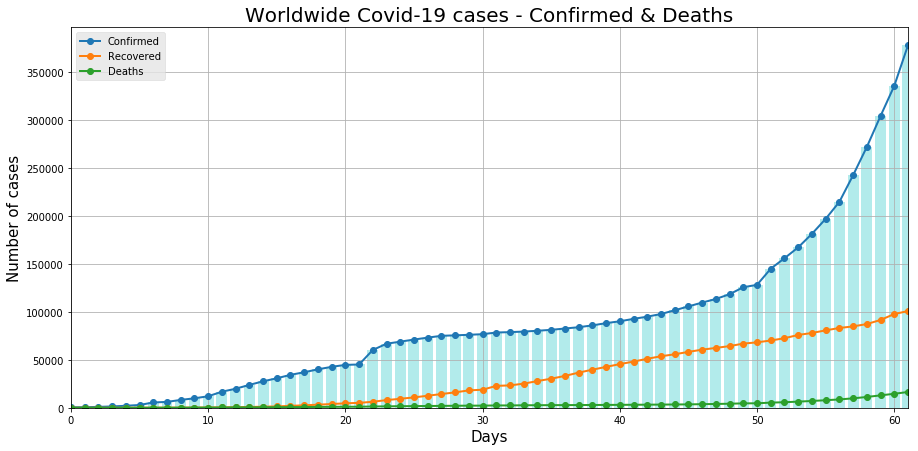

In [7]:
# Group df dataset by 'Date' with sum parameter and analyse the 'Confirmed','Deaths' values.
cases = df.groupby('Date').sum()[['Confirmed', 'Recovered', 'Deaths', ]].reset_index()
cases.plot(kind='line', figsize = (15,7) , marker='o',linewidth=2)
plt.bar(cases.index, cases['Confirmed'],alpha=0.3,color='c')
plt.xlabel('Days', fontsize=15)
plt.ylabel('Number of cases', fontsize=15)
plt.title('Worldwide Covid-19 cases - Confirmed & Deaths',fontsize=20)
plt.grid(True)
plt.style.use('ggplot')
plt.legend()

### Evaluating the most affected country - China 

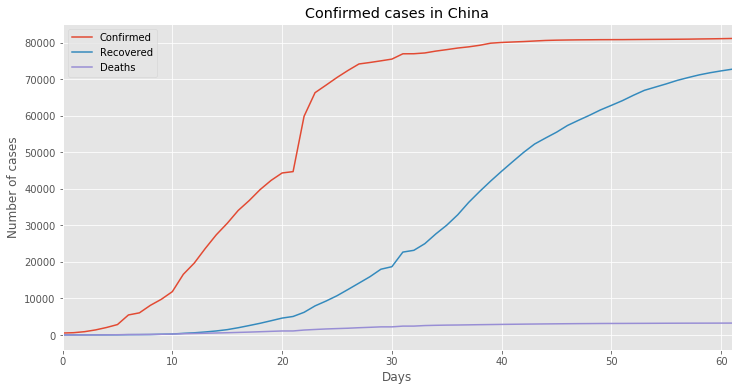

In [8]:
# Evaluate China's cases
df_china = df[df['Country']=='Mainland China']
df_china_daily = df_china.groupby('Date')[['Confirmed','Recovered', 'Deaths']].sum().reset_index()
df_china_daily.plot(kind='line', figsize = (12,6))
plt.xlabel('Days')
plt.ylabel('Number of cases')
plt.title('Confirmed cases in China')
plt.grid(True)
plt.show()

## Most affected countries

In [9]:
m_count = df.groupby(['Date', 'Country']).sum()[['Confirmed','Recovered','Deaths']].reset_index()
#The latest date reported in the dataset
latest_date = m_count['Date'].max()
m_count = m_count[(m_count['Date']==latest_date)][['Country', 'Confirmed', 'Recovered','Deaths']]
top_5=m_count.nlargest(5,['Confirmed']).reset_index()
top_5

,index,Country,Confirmed,Recovered,Deaths
0,4034,Mainland China,81116.0,72709.0,3270.0
1,4017,Italy,63927.0,7432.0,6077.0
2,4099,US,43667.0,0.0,552.0
3,4083,Spain,35136.0,3355.0,2311.0
4,3998,Germany,29056.0,453.0,123.0


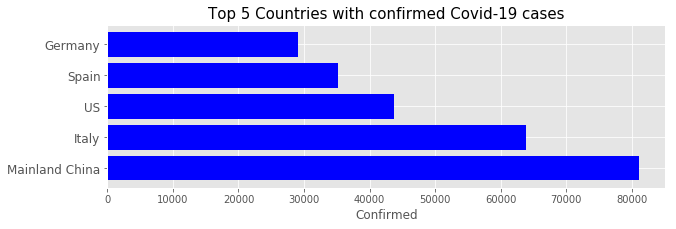

In [10]:
plt.figure(figsize=(10,3))
plt.title('Top 5 Countries with confirmed Covid-19 cases',fontsize=15)
plt.barh(top_5['Country'],top_5['Confirmed'],color='blue')
plt.yticks(fontsize=12)
plt.xlabel('Confirmed', fontsize=12)
plt.grid(True)
plt.show()

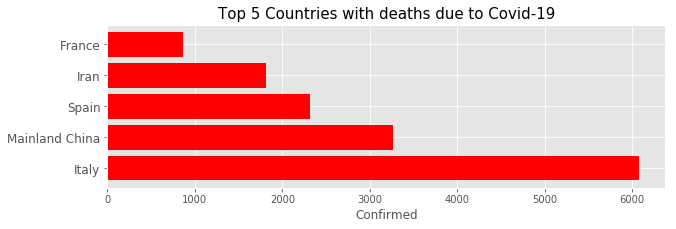

In [11]:
top_5_d=m_count.nlargest(5,['Deaths'])
plt.figure(figsize=(10,3))
plt.title('Top 5 Countries with deaths due to Covid-19',fontsize=15)
plt.barh(top_5_d['Country'],top_5_d['Deaths'],color='red')
plt.yticks(fontsize=12)
plt.xlabel('Confirmed', fontsize=12)
plt.grid(True)
plt.show()

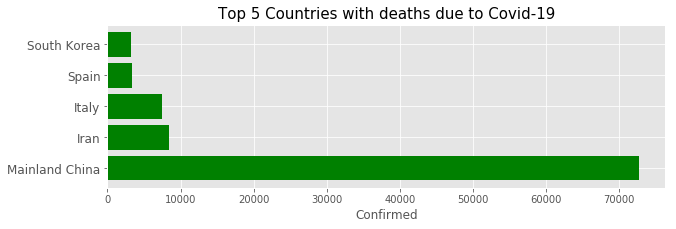

In [12]:
top_5_d=m_count.nlargest(5,['Recovered'])
plt.figure(figsize=(10,3))
plt.title('Top 5 Countries with deaths due to Covid-19',fontsize=15)
plt.barh(top_5_d['Country'],top_5_d['Recovered'],color='green')
plt.yticks(fontsize=12)
plt.xlabel('Confirmed', fontsize=12)
plt.grid(True)
plt.show()

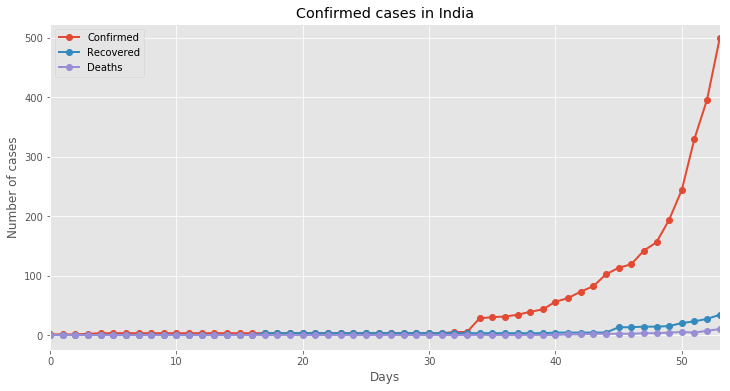

In [13]:
# Evaluate India's cases
df_india = df[df['Country']=='India']
df_india_daily = df_india.groupby('Date')[['Confirmed','Recovered', 'Deaths']].sum().reset_index()
df_india_daily.plot(kind='line', figsize = (12,6), marker='o',linewidth=2)
plt.xlabel('Days')
plt.ylabel('Number of cases')
plt.title('Confirmed cases in India')
plt.grid(True)
plt.show()

In [14]:
#Evaluate affected countries
confirmed = df.groupby(['Date', 'Country']).sum()[['Confirmed']].reset_index()
deaths = df.groupby(['Date', 'Country']).sum()[['Deaths']].reset_index()

In [15]:
#The latest date reported in the dataset
latest_date = confirmed['Date'].max()
latest_date

'03/23/2020'

In [16]:
confirmed = confirmed[(confirmed['Date']==latest_date)][['Country', 'Confirmed']]
deaths = deaths[(deaths['Date']==latest_date)][['Country', 'Deaths']]

In [17]:
# All the affected countries by Covid-19
all_countries = confirmed['Country'].unique()
print("Number of countries/regions with cases: " + str(len(all_countries)))
print("Countries/Regions with cases: ")
for i in all_countries:
    print("*    " + str(i))

Number of countries/regions with cases: 170
Countries/Regions with cases: 
*    Afghanistan
*    Albania
*    Algeria
*    Andorra
*    Angola
*    Antigua and Barbuda
*    Argentina
*    Armenia
*    Australia
*    Austria
*    Azerbaijan
*    Bahamas
*    Bahrain
*    Bangladesh
*    Barbados
*    Belarus
*    Belgium
*    Belize
*    Benin
*    Bhutan
*    Bolivia
*    Bosnia and Herzegovina
*    Brazil
*    Brunei
*    Bulgaria
*    Burkina Faso
*    Cabo Verde
*    Cambodia
*    Cameroon
*    Canada
*    Central African Republic
*    Chad
*    Chile
*    Colombia
*    Congo (Brazzaville)
*    Congo (Kinshasa)
*    Costa Rica
*    Croatia
*    Cuba
*    Cyprus
*    Czech Republic
*    Denmark
*    Djibouti
*    Dominica
*    Dominican Republic
*    Ecuador
*    Egypt
*    El Salvador
*    Equatorial Guinea
*    Eritrea
*    Estonia
*    Eswatini
*    Ethiopia
*    Fiji
*    Finland
*    France
*    Gabon
*    Gambia
*    Georgia
*    Germany
*    Ghana
*    Greece
*    Grenada
*   

## Predicting future Covid-19 cases
We are using Prophet forecasting method to predict the count of cases and deaths.

In [18]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()

In [19]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
confirmed.head()

,ds,y
0,2020-01-22,555.0
1,2020-01-23,653.0
2,2020-01-24,941.0
3,2020-01-25,1438.0
4,2020-01-26,2118.0


In [20]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=15)
future_confirmed = future.copy() # for non-baseline predictions later on
future.tail()

,ds
72,2020-04-03
73,2020-04-04
74,2020-04-05
75,2020-04-06
76,2020-04-07


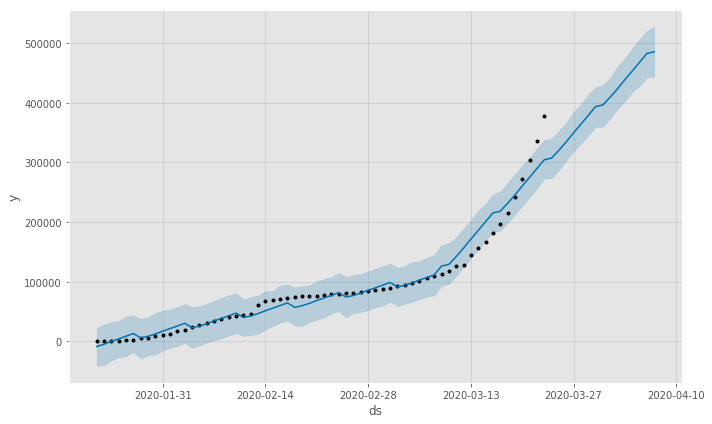

In [21]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
confirmed_forecast_plot = m.plot(forecast)

In [22]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=10)
future_deaths = future.copy() # for non-baseline predictions later on
future.tail()

,ds
67,2020-03-29
68,2020-03-30
69,2020-03-31
70,2020-04-01
71,2020-04-02


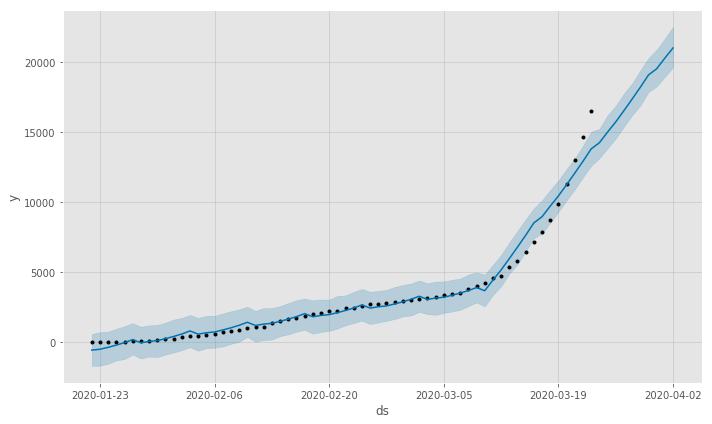

In [23]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
deaths_forecast_plot = m.plot(forecast)

# Thanks!
## Will keep updating the notebook